# Контрольная номер 2. Вариант 1


https://archive.ics.uci.edu/ml/datasets/Adult - датасет с социодемографической информацией о взрослых жителях некоторых стран.


## Задание 1 (1 балл)

Загрузите выборку (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) в dataframe (без признака `fnlwgt`).

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2020-05-23 07:23:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  7.11MB/s    in 0.5s    

2020-05-23 07:23:41 (7.11 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [9]:
df = pd.read_csv('adult.data', 
                 names=['age', 'workclass','fnlwgt','education', 'education-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'sex',
                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target'])
df = df.drop('fnlwgt', axis=1)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Задание 2 (2 балла)

Используя pandas и датасет, ответьте на вопросы:

1. У какого workclass доход чаще всего превышает 50K (1 балл)?
2. Постройте график зависимости доли людей с доходом больше 50K от возраста (1 балл).

In [70]:
df_workclass_age = df[df['target']==' >50K'].groupby(['workclass'])['target'].count()/df.groupby(['workclass'])['target'].count()
df_workclass_age.sort_values(ascending=False)

workclass
 Self-emp-inc        0.557348
 Federal-gov         0.386458
 Local-gov           0.294792
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Private             0.218673
 ?                   0.104031
 Never-worked             NaN
 Without-pay              NaN
Name: target, dtype: float64

У workclass с названием Self-emp-inc больше всего доля людей, доход которых превышает 50к

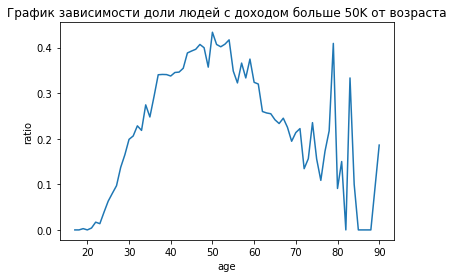

In [68]:
#поделим для каждого возраста число людей с доходом >50K на общее кол-во
df_target_age = df[df['target']==' >50K'].groupby(['age'])['target'].count()/df.groupby(['age'])['target'].count()
#если появился NaN, то это, скорее всего, вообще нет людей с доходом >50K
df_target_age.fillna(0).plot()
plt.ylabel('ratio')
plt.title('График зависимости доли людей с доходом больше 50K от возраста')
plt.show()

## Задание 3  (1 балл)

Преобразуйте категориальные признаки в бинарные.

Разделите выборку на тренировочную и тестовую (80%/20%) с сохранением баланса классов.


In [72]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,...,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ >50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
RANDOM_STATE = 10

target = df['target_ >50K']
data = df.drop('target_ >50K', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=RANDOM_STATE, stratify=target)

## Задание 4 (3 балла)

Используя обучающую выборку, подберите модель `sklearn.ensemble.RandomForestClassifier`. Использйте стратегию k-fold и перебор параметров (например, поэксперементируйте с числом деревьев и максимальной глубиной дерева) через gridsearchcv.

Если модели слишком долго обучаются, допускается уменьшить количество объектов в обучающей выборке до 5000-10000 с сохранением баланса классов (если качество модели станет хуже, не страшно), изменив долю тренировочной выборки в задании 3.

Выведите 3 самых важных признака, а также precision и recall на тестовой выборке.

In [77]:
%%time
params = {'n_estimators': list(range(50,300,50)),
          'max_depth': list(range(3, 10, 1)),
          'min_samples_leaf': [1, 2, 4, 6],
          'min_samples_split': [2, 4, 6, 8, 10],
}

rfc = RandomForestClassifier(random_state = RANDOM_STATE)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5)
CV_rfc.fit(X_train, y_train)

CPU times: user 1h 19min 42s, sys: 6.37 s, total: 1h 19min 48s
Wall time: 1h 19min 52s


Извините, я не думала, что это будет так долго работать

In [78]:
CV_rfc.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [82]:
best_rfc =  RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=50)
best_rfc.fit(X_train, y_train)
predictions = best_rfc.predict(X_test)
print('Precision score on test: ', precision_score(y_test, predictions))
print('Recall score on test: ', recall_score(y_test, predictions))

Precision score on test:  0.7984420642648491
Recall score on test:  0.5229591836734694


In [87]:
feature_importances = best_rfc.feature_importances_
for ind in np.argsort(-feature_importances)[:3]:
    print(data.columns[ind], '-', feature_importances[ind])

marital-status_ Married-civ-spouse - 0.2140910295252825
capital-gain - 0.1435791727102869
education-num - 0.1271293153445449


## Задание 5 (1.5 балла)

На графике востановленная моделью зависисмость y от x. Что вы можете сказать про качество обучения модели? Насколько качественно модель будет работать на тестовых данных? Почему вы так думаете?
![](https://www.dropbox.com/s/fwwx19pw4hsjxox/1_1.png?dl=1)

На графике изображен результат решения задачи регрессии, т.е. восстановления вещественного числа. Соответственно, линия графика с предсказаниями model predictions должна максимально повторить рисунок точек, изображающих примеры обучающей выборки (пройти через максимальное количество точек). На графике наблюдается совсем противоположная картина: к линии предсказания модели принадлежат совсем немного точек, в то время как их большое количество находится довольно далеко от нее. Это значит, что модель недообучилась, т.е. не смогла обеспечить минимизацию ошибки на обучающей выборке и не настроилась на ее паттерны. Для этих данных использованная модель слишком простая. Соответственно, и на тестовой выборке качество модели будет не очень хорошим. 

## Задание 6 (1.5 балла)
Вы обучили вот такую модель. Качество на тестовой выборке плохое. Как вы думаете почему? Какой параметр стоило бы поменять в первую очередь, чтобы это исправить? На что он влияет?
![img](https://www.dropbox.com/s/aq4hul4gfclskr9/3_1.png?dl=1)

Модель - градиентный бустинг для MSE. Чем больше он имеет базовых моделей в составе, тем больше риск переобучения. В нашей модели n_estimators=1000. Этот параметр как раз отвечает за количество базовых алгоритмов в композиции. Это очень много, по сравнению с классическим рекомендуемым количеством (100). Соответственно, скорее всего, модель переобучилась на обучающих данных, поэтому демонстрирует плохое качество на тесте. Я бы также не стала указывать None для параметра max_depth, который отвечает за максимальную глубину дерева, потому что таким образом мы разрешаем дереву быть сколь угодно глубоким. Но для бустинга это не хорошо, для бустинга лучше использовать неглубокие деревья